# Social Buzz Analysis with exploratory data analysis

First Step import Libraries

In [58]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

Import content csv data file

In [3]:
content = pd.read_csv('Content (1).csv')

In [4]:
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   User ID     1000 non-null   object
 3   Type        1000 non-null   object
 4   Category    1000 non-null   object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


First, we removed the User ID and URL columns since they're unnecessary for our analysis. Then, we examined the values in the
category column to ensure they're appropriate and coherent within the context of our dataset.

# Data Cleaning

In [5]:
content.drop(labels=['User ID','URL'],axis=1,inplace=True)


In [6]:
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   Type        1000 non-null   object
 3   Category    1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [7]:
content['Category'].value_counts()


Category
technology           71
animals              67
travel               67
culture              63
science              63
fitness              61
food                 61
healthy eating       61
cooking              60
soccer               58
tennis               58
education            57
dogs                 56
studying             55
veganism             48
public speaking      48
Fitness               5
Animals               4
Science               4
"soccer"              3
"culture"             3
Soccer                3
"dogs"                2
Education             2
Studying              2
Travel                2
Food                  2
"veganism"            1
"public speaking"     1
Public Speaking       1
"technology"          1
"cooking"             1
Healthy Eating        1
"studying"            1
"food"                1
Culture               1
"tennis"              1
Technology            1
"animals"             1
Veganism              1
"science"             1
Name: c

We're refining the categories by eliminating punctuation and standardizing capitalization for consistency.

In [9]:
#strip quote mark and lowercase all values
content['Category'] = content['Category'].apply(lambda x:x.strip('"').lower())
     

In [10]:
#check if all categories are in lower case
content['Category'].value_counts()
     

Category
technology         73
animals            72
travel             69
science            68
culture            67
fitness            66
food               64
soccer             64
healthy eating     62
cooking            61
tennis             59
education          59
studying           58
dogs               58
public speaking    50
veganism           50
Name: count, dtype: int64

In [11]:
#rename content to content_type
content.rename(columns={'Type':'Content_Type'},inplace=True)
content['Content_Type'].value_counts()

Content_Type
photo    261
video    259
GIF      244
audio    236
Name: count, dtype: int64

Import reaction csv data file

In [13]:
reaction = pd.read_csv('Reactions (1).csv')

In [15]:
reaction.sample(3)

,Unnamed: 0,Content ID,User ID,Type,Datetime
1909,1909,409aa11d-5af3-4a70-9da1-482857f5835e,ddc4db8e-0000-48c4-8fdb-d32af87fb823,intrigued,2020-12-26 14:51:03
13280,13280,2073855c-fab2-41ee-ad15-d4269b2ac4bd,e89d4cb0-3bec-43b8-8060-719983fe68a9,super love,2020-08-15 07:03:46
12693,12693,301cfd14-3e4f-4058-b253-c591ef150888,30be2156-59d1-451e-beea-1a3690200a2b,interested,2021-02-23 16:29:08


In [ ]:
# drop user ID column
reaction.drop(labels = ['User ID'],axis=1,inplace=True)
     

In [69]:
reaction.drop(labels = ['Datetime'],axis=1,inplace=True)


In [70]:
reaction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24573 entries, 1 to 25552
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Content ID     24573 non-null  object
 1   Reaction_Type  24573 non-null  object
dtypes: object(2)
memory usage: 575.9+ KB


We'll start by removing the User ID  and Datetime column. Then, we'll drop any rows that have missing values.Lastly, we'll rename the "Type" column to match the changes we made for the Content table.

In [25]:
#drop rows with missing values
reaction.dropna(inplace=True)

In [27]:
#rename column
reaction.rename(columns={"Type":'Reaction_Type'},inplace=True)
     

In [71]:
reaction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24573 entries, 1 to 25552
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Content ID     24573 non-null  object
 1   Reaction_Type  24573 non-null  object
dtypes: object(2)
memory usage: 575.9+ KB


Import reactiontypes csv data file

In [42]:
reactiontype = pd.read_csv('ReactionTypes (1).csv')

In [43]:
reactiontype.sample(3)

,Unnamed: 0,Type,Sentiment,Score
12,12,intrigued,positive,45
3,3,hate,negative,5
0,0,heart,positive,60


In [47]:
#rename type column
reactiontype.rename(columns={'Type':'Reaction_Type'},inplace=True)
reactiontype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     16 non-null     int64 
 1   Reaction_Type  16 non-null     object
 2   Sentiment      16 non-null     object
 3   Score          16 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 644.0+ bytes


In [52]:
reactiontype = reactiontype.drop("Unnamed: 0",axis = 1)
print(reactiontype.head())

  Reaction_Type Sentiment  Score
0         heart  positive     60
1          want  positive     70
2       disgust  negative      0
3          hate  negative      5
4    interested  positive     30


In [53]:
reactiontype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Reaction_Type  16 non-null     object
 1   Sentiment      16 non-null     object
 2   Score          16 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 516.0+ bytes


In [54]:
reactiontype.value_counts()
     

Reaction_Type  Sentiment  Score
adore          positive   72       1
cherish        positive   70       1
disgust        negative   0        1
dislike        negative   10       1
hate           negative   5        1
heart          positive   60       1
indifferent    neutral    20       1
interested     positive   30       1
intrigued      positive   45       1
like           positive   50       1
love           positive   65       1
peeking        neutral    35       1
scared         negative   15       1
super love     positive   75       1
want           positive   70       1
worried        negative   12       1
Name: count, dtype: int64

Our data has undergone thorough cleaning according to the client's requirements. We removed rows containing missing values, dropped unnecessary columns, and ensured that the data types of each column match their respective values.

# Data Modelling

# Creating a joined table for analysis

In [55]:
#To merge the data sets, we are going to have to rename either one of the colums from reactions or reactionsType to make it easy to merge
# renaming the 'Reaction Type' column to 'Type'
reaction = reaction.rename(columns={'Reaction Type': 'Type'})
reaction.head(5)

,Content ID,Reaction_Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58


In [73]:
# Merging content_data and reactions_data on Content ID
merged_data = pd.merge(content, reaction, on='Content ID')

# merge merged_data and reaction_types_data on Type
final_data = pd.merge(merged_data, reactiontype, on='Reaction_Type')

# display the final merged data set
final_data.head()
     

,Content ID,Content_Type,Category,Reaction_Type,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating,disgust,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating,disgust,negative,0


In [74]:
final_data.shape

(24573, 6)

In [75]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Content ID     24573 non-null  object
 1   Content_Type   24573 non-null  object
 2   Category       24573 non-null  object
 3   Reaction_Type  24573 non-null  object
 4   Sentiment      24573 non-null  object
 5   Score          24573 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.1+ MB


In [76]:
final_data.describe()

,Score
count,24573.000000
mean,39.622553
std,26.043011
min,0.000000
25%,15.000000
50%,35.000000
75%,65.000000
max,75.000000


# Exploratory Data Analysis

In [77]:
print(final_data['Content_Type'].unique())
print(final_data['Sentiment'].unique())
print(final_data['Category'].unique())
print(final_data['Reaction_Type'].unique())
     

['photo' 'video' 'GIF' 'audio']
['negative' 'positive' 'neutral']
['studying' 'healthy eating' 'dogs' 'public speaking' 'science' 'tennis'
 'food' 'fitness' 'soccer' 'education' 'travel' 'veganism' 'cooking'
 'technology' 'animals' 'culture']
['disgust' 'dislike' 'scared' 'interested' 'peeking' 'cherish' 'hate'
 'love' 'indifferent' 'super love' 'intrigued' 'worried' 'like' 'heart'
 'want' 'adore']


In [78]:
#Which content type received the most reactions?
final_data['Content_Type'].value_counts()
     

Content_Type
photo    6589
video    6245
GIF      6079
audio    5660
Name: count, dtype: int64

# Top 5 Categories Analysis

In [65]:
final_data['Category'].value_counts()


Category
animals            1897
science            1796
healthy eating     1717
food               1699
technology         1698
culture            1676
cooking            1664
travel             1647
soccer             1457
education          1433
fitness            1395
studying           1363
dogs               1338
tennis             1328
veganism           1248
public speaking    1217
Name: count, dtype: int64

In [79]:
#Top 5 Categories
category_count = final_data['Category'].value_counts().nlargest(5)
print(category_count)

Category
animals           1897
science           1796
healthy eating    1717
food              1699
technology        1698
Name: count, dtype: int64


To determine the highest aggregate popularity for each category, we sum the values in the "Score" column for each category.

In [80]:
top_five = final_data.groupby('Category').sum().sort_values(by='Score',ascending=False)
top_five.head(5)
     

,Content ID,Content_Type,Reaction_Type,Sentiment,Score
Category,,,,,
animals,4fa14453-7b29-4302-b51f-9aa23b472c1b4478d98e-4...,audioaudiophotophotophotophotophotovideovideov...,disgustdisgustdisgustdisgustdisgustdisgustdisg...,negativenegativenegativenegativenegativenegati...,74965
science,5118e9c5-1377-4cc5-a486-65b35b7b7b7634a3747a-0...,GIFGIFGIFvideovideovideovideovideoaudioaudioau...,disgustdisgustdisgustdisgustdisgustdisgustdisg...,negativenegativenegativenegativenegativenegati...,71168
healthy eating,9f737e0a-3cdd-4d29-9d24-753f4e3be810230c4e4d-7...,photophotophotoGIFGIFGIFGIFGIFGIFGIFGIFGIFGIFv...,disgustdisgustdisgustdisgustdisgustdisgustdisg...,negativenegativenegativenegativenegativenegati...,69339
technology,49367a0f-1fd5-4417-a7c9-4a154e1ae0ad49367a0f-1...,photophotovideovideovideoGIFaudioaudioaudioaud...,disgustdisgustdisgustdisgustdisgustdisgustdisg...,negativenegativenegativenegativenegativenegati...,68738
food,81abd65a-3b76-4574-a0a7-db6bf7184ae281abd65a-3...,videovideovideovideovideovideovideovideovideoa...,disgustdisgustdisgustdisgustdisgustdisgustdisg...,negativenegativenegativenegativenegativenegati...,66676


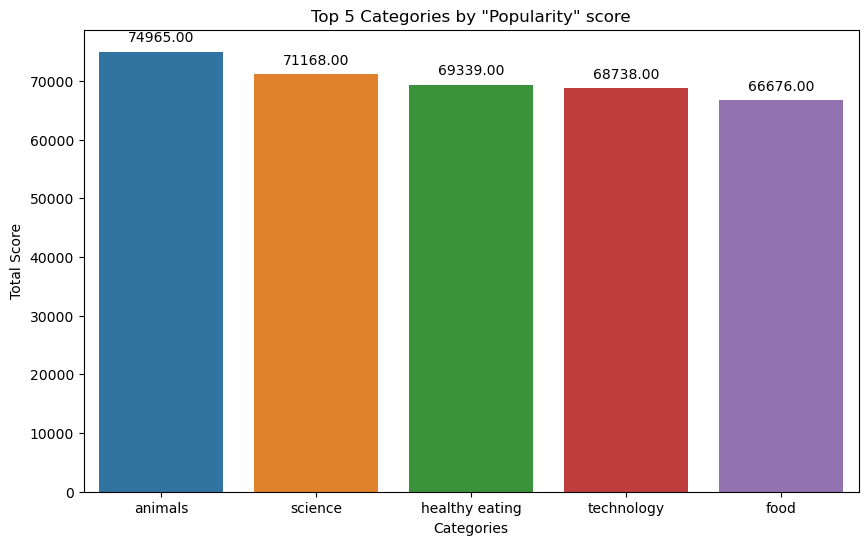

In [85]:
final_data = top_five.head(5)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=final_data.index, y='Score', data=final_data)

# Adding annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Top 5 Categories by "Popularity" score')
plt.xlabel('Categories')
plt.ylabel('Total Score')
plt.show()

Based on the chart, the top 5 categories are: Animal, Healthy Eating, Technology, Science, and Cooking. Among these, the top category is Animal.

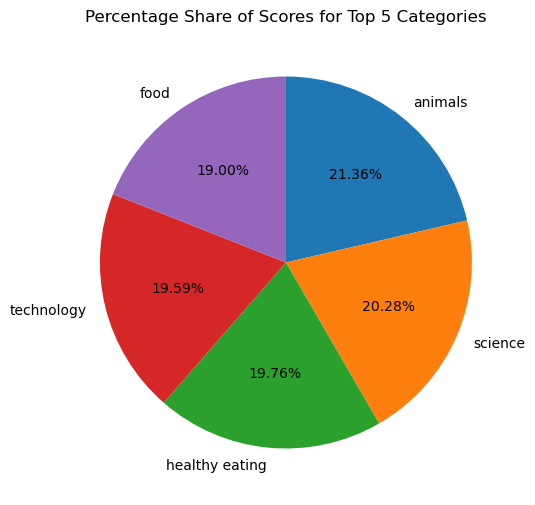

In [91]:
data = {'Category': ['animals', 'science', 'healthy eating', 'technology', 'food'],
        'Score': [74965, 71168, 69339, 68738, 66676]}
final_data = pd.DataFrame(data)
final_data_sorted = final_data.sort_values(by='Score', ascending=False)

top_five_categories = final_data_sorted.head(5)

final_data = top_five_categories.copy()

final_data.loc[:, 'Percentage Share'] = (final_data['Score'] / final_data['Score'].sum()) * 100

plt.figure(figsize=(6, 10))
plt.pie(final_data['Percentage Share'], labels=final_data['Category'], autopct='%1.2f%%', startangle=90, counterclock=False)

plt.title('Percentage Share of Scores for Top 5 Categories')
plt.show()
     
